# Face Parser

https://github.com/shaoanlu/face_toolbox_keras

In [1]:
from BiSeNet.bisenet import BiSeNet_keras
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
path_bisenet_weights="BiSeNet/BiSeNet_keras.h5"

In [3]:
parser_net = BiSeNet_keras()

In [4]:
parser_net.load_weights(path_bisenet_weights)

In [5]:
def normalize_input(x, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)):
        # x should be RGB with range [0, 255]
        return ((x / 255) - mean)  / std

In [69]:
def resize_image(im, max_size=768):
    if np.max(im.shape) > max_size:
        ratio = max_size / np.max(im.shape)
        print(f"Resize image to ({str(int(im.shape[1]*ratio))}, {str(int(im.shape[0]*ratio))}).")
        return cv2.resize(im, (0,0), fx=ratio, fy=ratio)
    return im

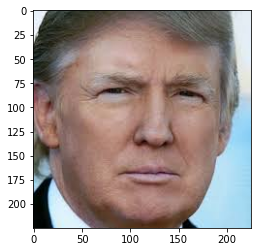

In [70]:
# Test images are obtained on https://www.pexels.com/
im = cv2.imread("DT.jpg")[..., ::-1]
#im = cv2.imread("images/IMG_6818.JPG")
im = resize_image(im) # Resize image to prevent GPU OOM.
h, w, _ = im.shape
plt.imshow(im)

In [58]:
face=im
orig_h, orig_w = face.shape[:2]
inp = cv2.resize(face, (512,512))
inp = normalize_input(inp)
inp = inp[None, ...]

In [71]:
out = parser_net.predict([inp])[0]
#out = prs.parse_face(im)

In [72]:
parsing_map = out.argmax(axis=-1)
parsing_map = cv2.resize(
  parsing_map.astype(np.uint8), 
  (orig_w, orig_h), 
  interpolation=cv2.INTER_NEAREST)

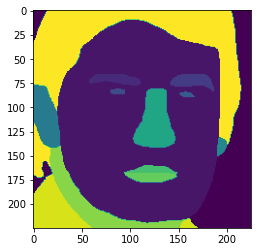

In [74]:
plt.imshow(parsing_map)

In [75]:
out[0].shape
parsing_map.shape

(225, 225)

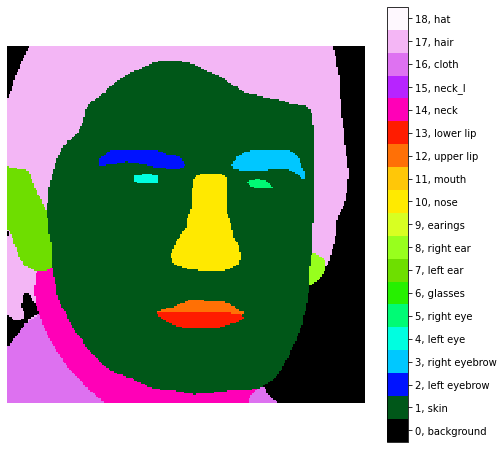

In [76]:
from visualize import show_parsing_with_annos
show_parsing_with_annos(parsing_map)

In [19]:
parser_net.save("parser_net.h5")

In [18]:
import tensorflow as tf
import keras
print ('Keras:' + keras.__version__)
print ('Tensorflow:' + tf.__version__)

Keras:2.4.3
Tensorflow:2.4.1


# Loading Model

In [77]:
from keras.models import load_model
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [78]:
def normalize_input(x, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)):
        # x should be RGB with range [0, 255]
        return ((x / 255) - mean)  / std

In [79]:
model = load_model('parser_net.h5', custom_objects={'tf': tf})

In [80]:
im = cv2.imread("DT.jpg")[..., ::-1]
face=im
orig_h, orig_w = face.shape[:2]
inp = cv2.resize(face, (512,512))
inp = normalize_input(inp)
inp = inp[None, ...]

In [81]:
out = model.predict([inp])[0]

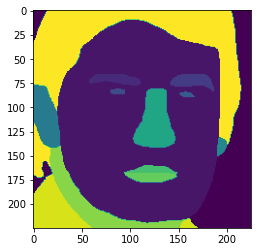

In [82]:
parsing_map = out.argmax(axis=-1)
parsing_map = cv2.resize(
  parsing_map.astype(np.uint8), 
  (orig_w, orig_h), 
  interpolation=cv2.INTER_NEAREST)
plt.imshow(parsing_map)

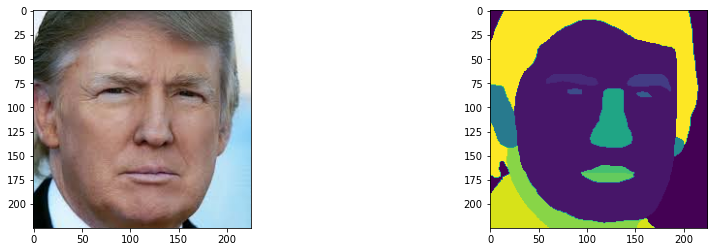

In [83]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
#plt.title("Left eye")
plt.imshow(im)

plt.subplot(1,2,2)
plt.imshow(parsing_map)

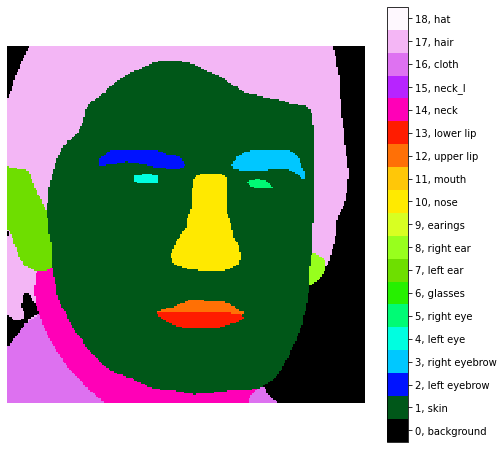

In [84]:
from visualize import show_parsing_with_annos
show_parsing_with_annos(parsing_map)